## Help your hedge fund manager!

You have two datasets at your disposal: `Balance_Sheet.xlsx` and `Income_Statement.xlsx`. Both these datasets have three columns in common:
- `"Company"`: The company's ticker name.
- `"comp_type"` The type of industry the company in question belongs to. It is either `"tech"` for companies in the technology industry, `"fmcg"` for companies in the fast-moving consumer goods industry, and `"real_est"` for companies in the real estate industry. 
- `"Year"`: The year the company's information is from.

The rest of the columns in the datasets contain information from the financial statement of the `"Company"` in question. Note that the columns in `Balance_Sheet.xlsx` only contain financial information from the balance sheet. Similarly, the columns in `Income_Statement.xlsx` only contain financial information from the income statement. The columns are named accordingly. For instance, the column `"Total Liab"` from `Balance_Sheet.xlsx` is the total liability.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
balance_sheet = pd.read_excel("data/Balance_Sheet.xlsx")
income_statement = pd.read_excel("data/Income_Statement.xlsx")
balance_sheet.head(5)
income_statement.head(5)

,Unnamed: 0,Year,comp_type,company,Cost Of Goods Sold,Gross Profit,Operating Income,Total Operating Expenses,Total Revenue
0,0,2019,tech,AAPL,161782000000,98392000000,63930000000,196244000000,260174000000
1,1,2020,tech,AAPL,169559000000,104956000000,66288000000,208227000000,274515000000
2,2,2021,tech,AAPL,212981000000,152836000000,108949000000,256868000000,365817000000
3,3,2022,tech,AAPL,223546000000,170782000000,119437000000,274891000000,394328000000
4,4,2019,tech,MSFT,42910000000,82933000000,42959000000,82884000000,125843000000


In [31]:
df = pd.merge(balance_sheet, income_statement, on=["company", "Year", "comp_type"])

In [32]:
df = df.dropna(subset=["Total Stockholder Equity", "Total Liab", "Gross Profit", "Total Revenue"])
df = df[(df["Total Stockholder Equity"] != 0) & (df["Total Revenue"] != 0)]

In [33]:
df["leverage_ratio"] = df["Total Liab"] / df["Total Stockholder Equity"]

In [34]:
df["profitability_ratio"] = df["Gross Profit"] / df["Total Revenue"]

In [35]:
df_ratios = df[["company", "comp_type", "Year", "leverage_ratio", "profitability_ratio"]]

In [36]:
lowest_profitability = (
    df_ratios.groupby("comp_type")["profitability_ratio"]
    .mean()
    .idxmin()
)

In [37]:
highest_leverage = (
    df_ratios.groupby("comp_type")["leverage_ratio"]
    .mean()
    .idxmax()
)

In [38]:
real_est_df = df_ratios[df_ratios["comp_type"] == "real_est"]
correlation = real_est_df["leverage_ratio"].corr(real_est_df["profitability_ratio"])

In [39]:
if correlation > 0.1:
    relationship = "positive"
elif correlation < -0.1:
    relationship = "negative"
else:
    relationship = "no relationship"

# Output answers
print("Lowest profitability comp_type:", lowest_profitability)
print("Highest leverage comp_type:", highest_leverage)
print("Relationship in real estate companies:", relationship)

Lowest profitability comp_type: fmcg
Highest leverage comp_type: real_est
Relationship in real estate companies: positive


## Total Revenue over Years by Sector

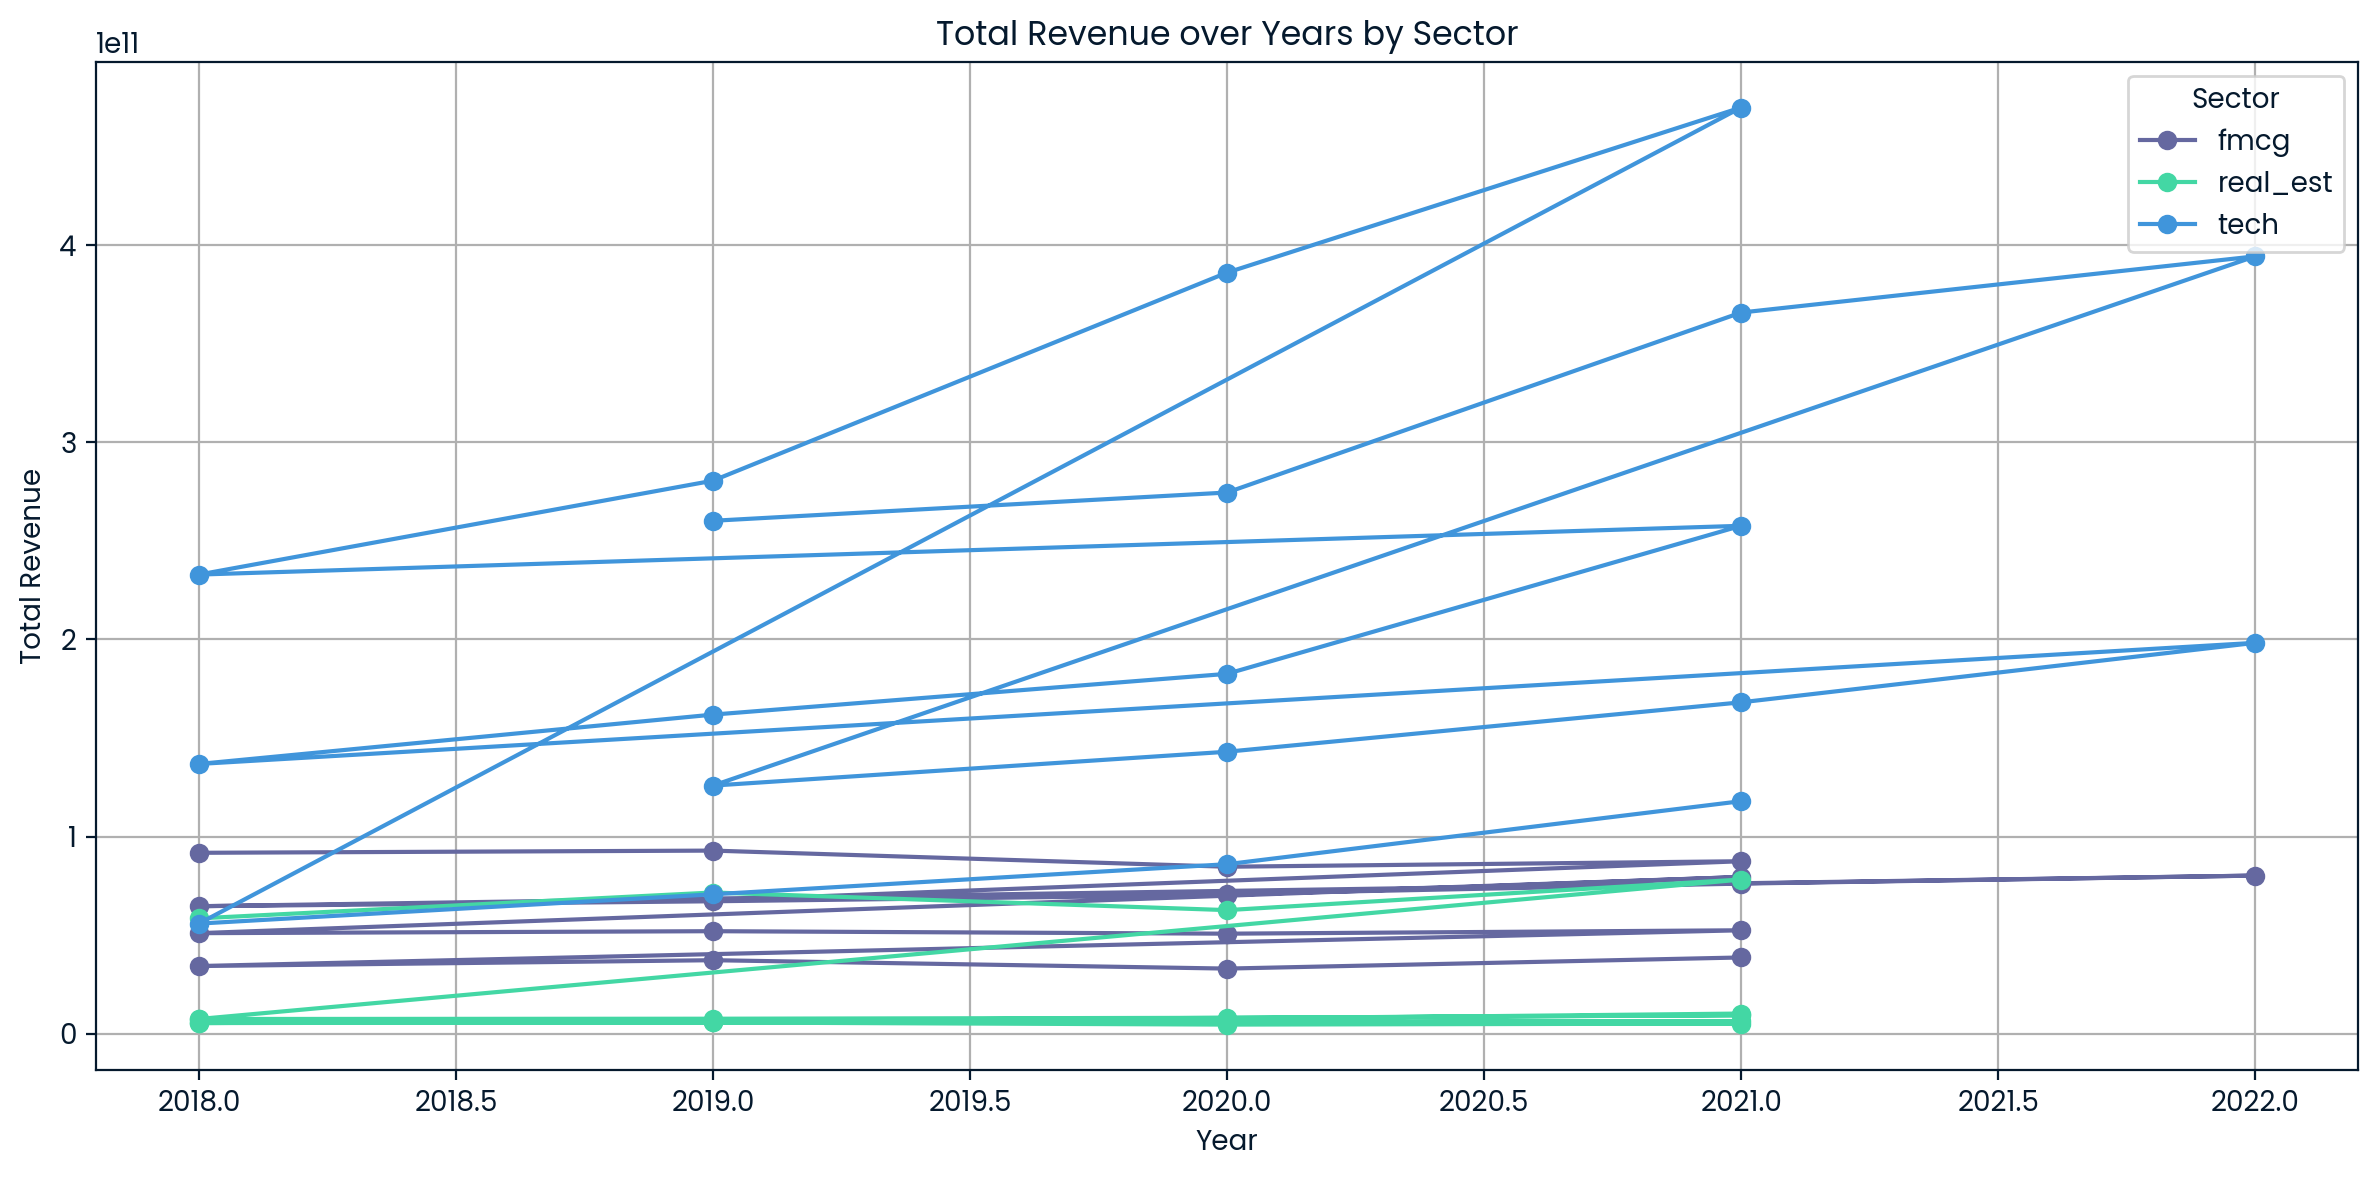

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Load your data ---
income_path = "data/Income_Statement.xlsx"  # Updated the path to a relative path
try:
    df = pd.read_excel(income_path)
except FileNotFoundError as e:
    print(f"File not found: {income_path}")
    # Handle the error or exit
    import sys
    sys.exit(1)

# Drop unnamed index column if it exists
if "Unnamed: 0" in df.columns:
    df.drop(columns=["Unnamed: 0"], inplace=True)

# Ensure Year is numeric
df["Year"] = pd.to_numeric(df["Year"], errors="coerce")

# --- Plot ---
plt.figure(figsize=(12, 6))
for sector, sector_df in df.groupby("comp_type"):
    plt.plot(sector_df["Year"], sector_df["Total Revenue"], marker="o", label=sector)

plt.title("Total Revenue over Years by Sector")
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.legend(title="Sector")
plt.grid(True)
plt.tight_layout()
plt.show()

## Operating Income by Company and Year

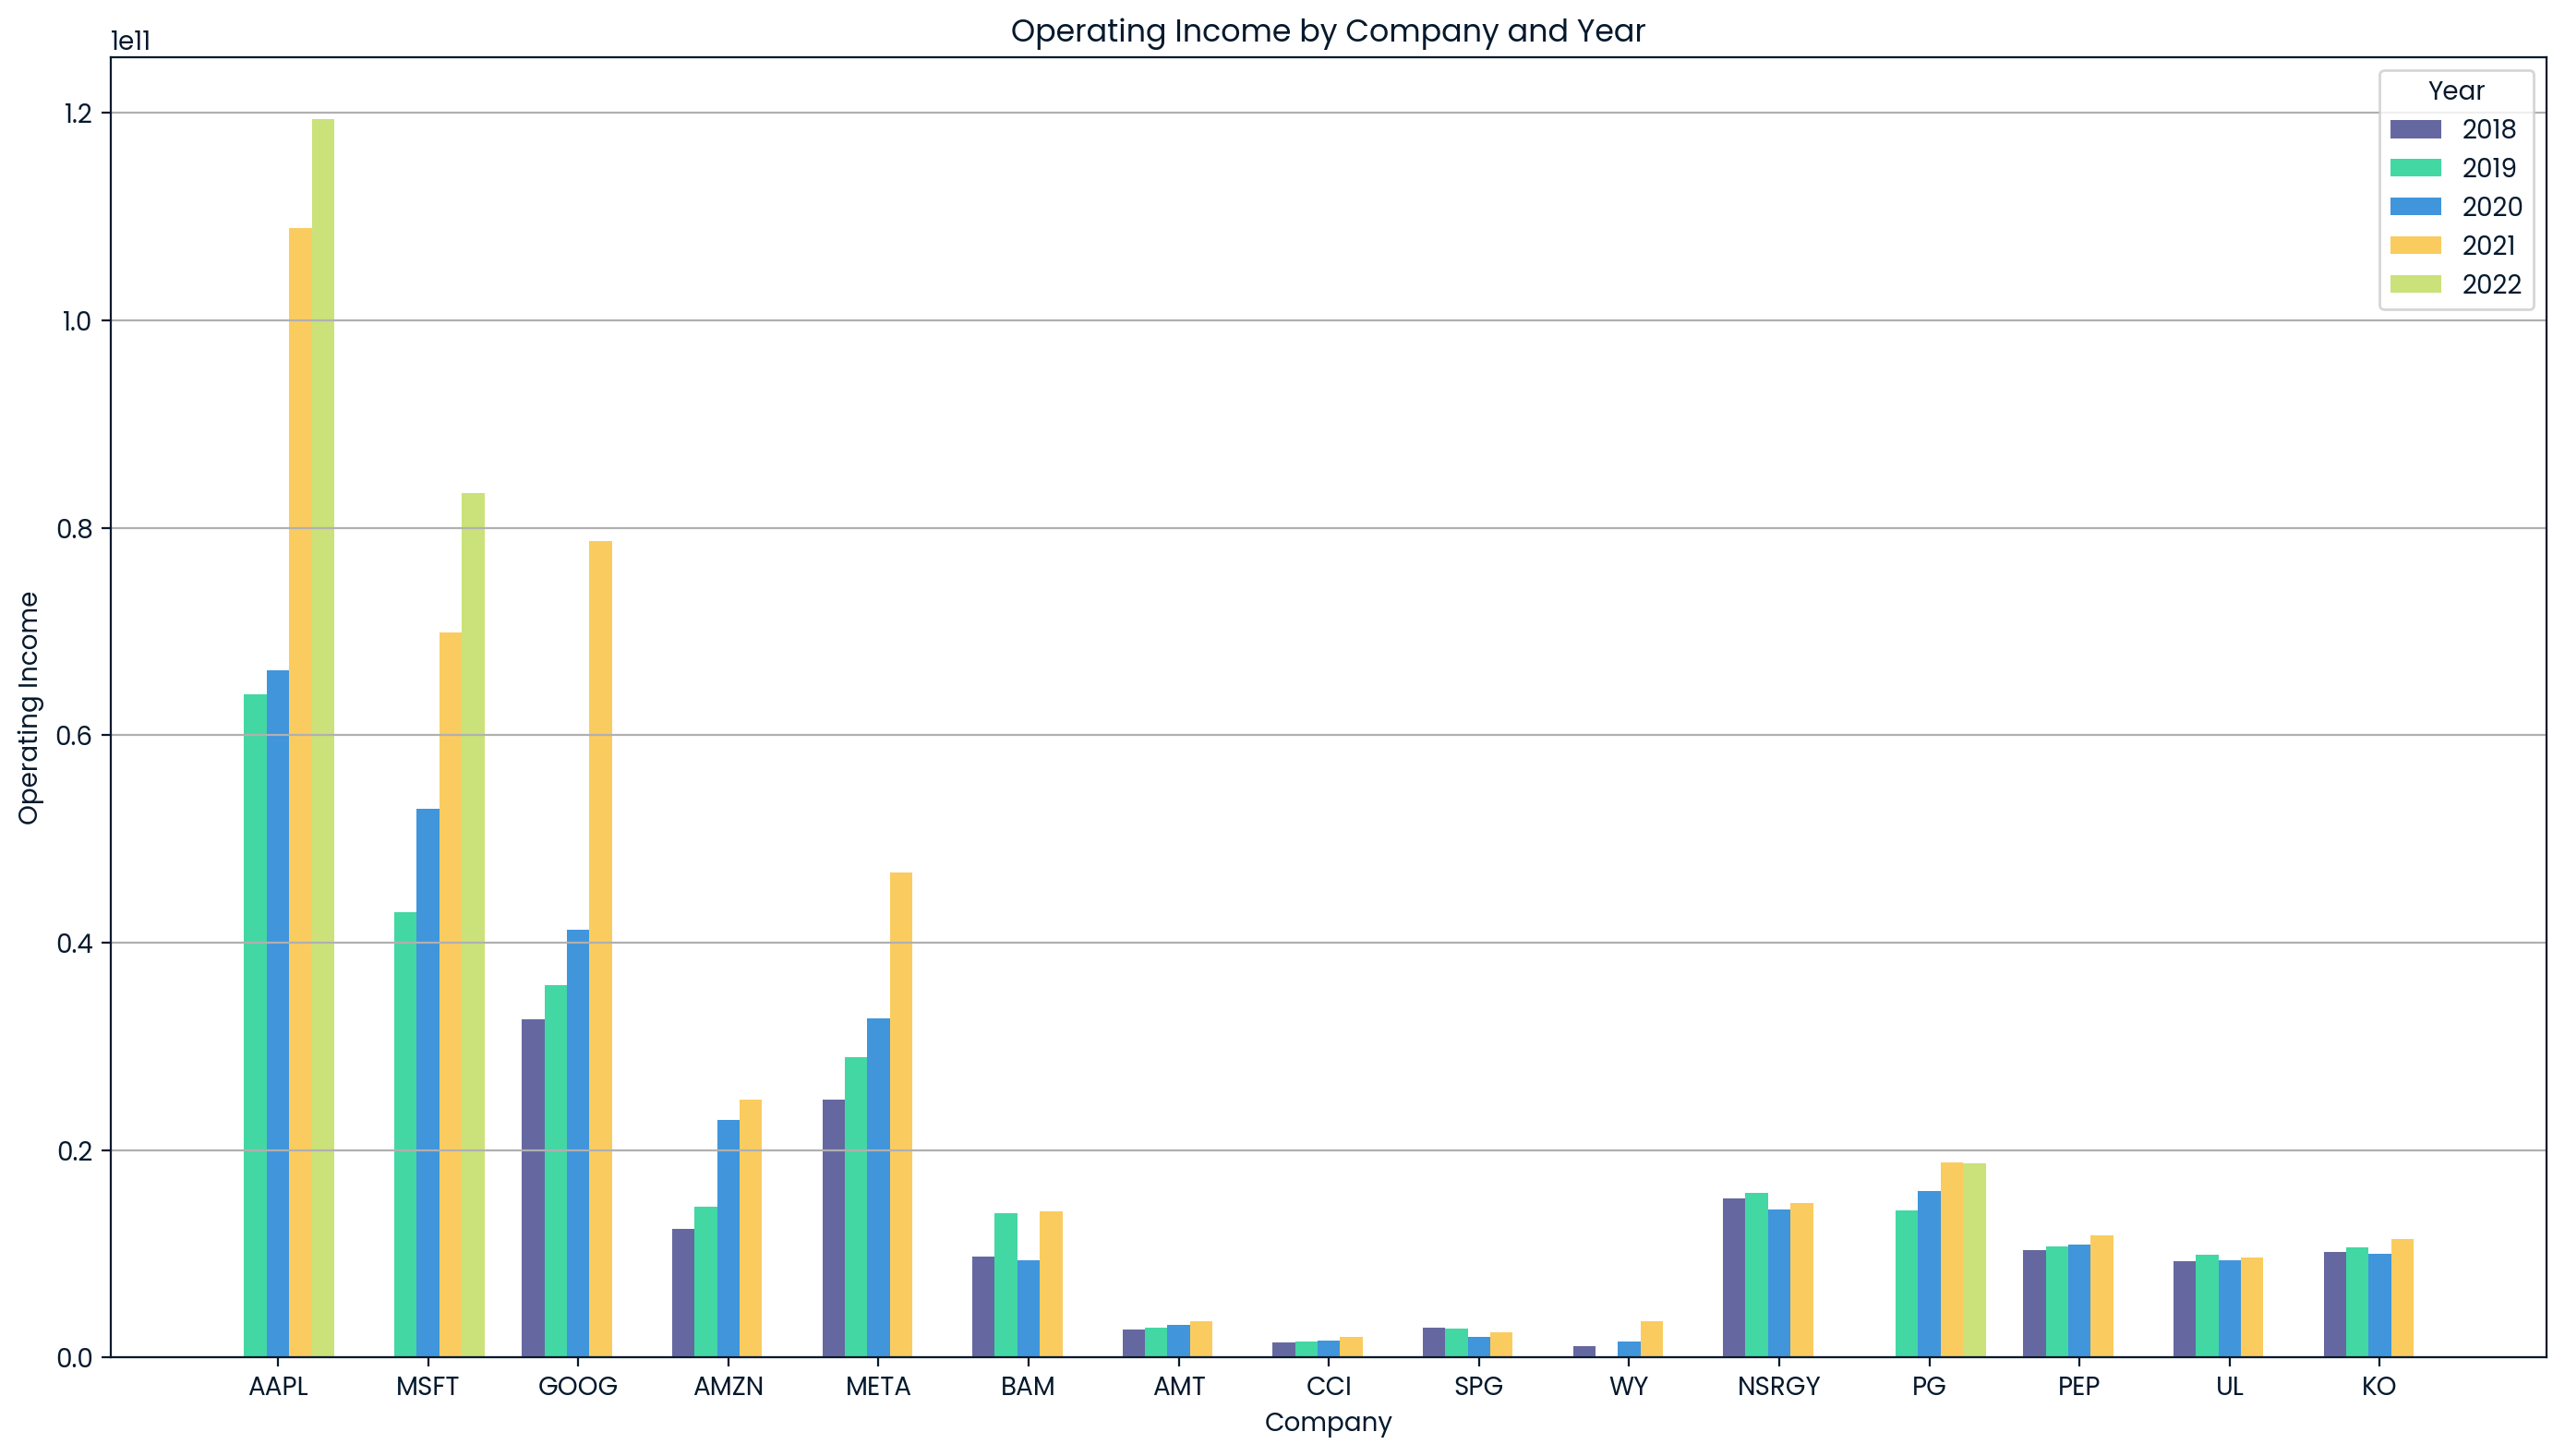

In [10]:

# Load data
income_path = "data/Income_Statement.xlsx"
df = pd.read_excel(income_path)

# Drop index-like column if present
if "Unnamed: 0" in df.columns:
    df.drop(columns=["Unnamed: 0"], inplace=True)

# Ensure Year is treated as a string for categorical plotting
df["Year"] = df["Year"].astype(str)

# Prepare bar positions
companies = df["company"].unique()
years = sorted(df["Year"].unique())

bar_width = 0.15
x = range(len(companies))

plt.figure(figsize=(14, 8))

# Offset bars for each year
for i, year in enumerate(years):
    year_df = df[df["Year"] == year]
    # Align bars by company order
    heights = [year_df[year_df["company"] == co]["Operating Income"].values[0] 
               if not year_df[year_df["company"] == co].empty else 0
               for co in companies]
    plt.bar([pos + i * bar_width for pos in x], heights, width=bar_width, label=year)

# Titles and labels
plt.title("Operating Income by Company and Year")
plt.xlabel("Company")
plt.ylabel("Operating Income")
plt.xticks([pos + bar_width*(len(years)-1)/2 for pos in x], companies)
plt.legend(title="Year")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


## Correlation Heatmap

Available columns: Index(['Year', 'comp_type', 'company', 'Cost Of Goods Sold', 'Gross Profit',
       'Operating Income', 'Total Operating Expenses', 'Total Revenue'],
      dtype='object')


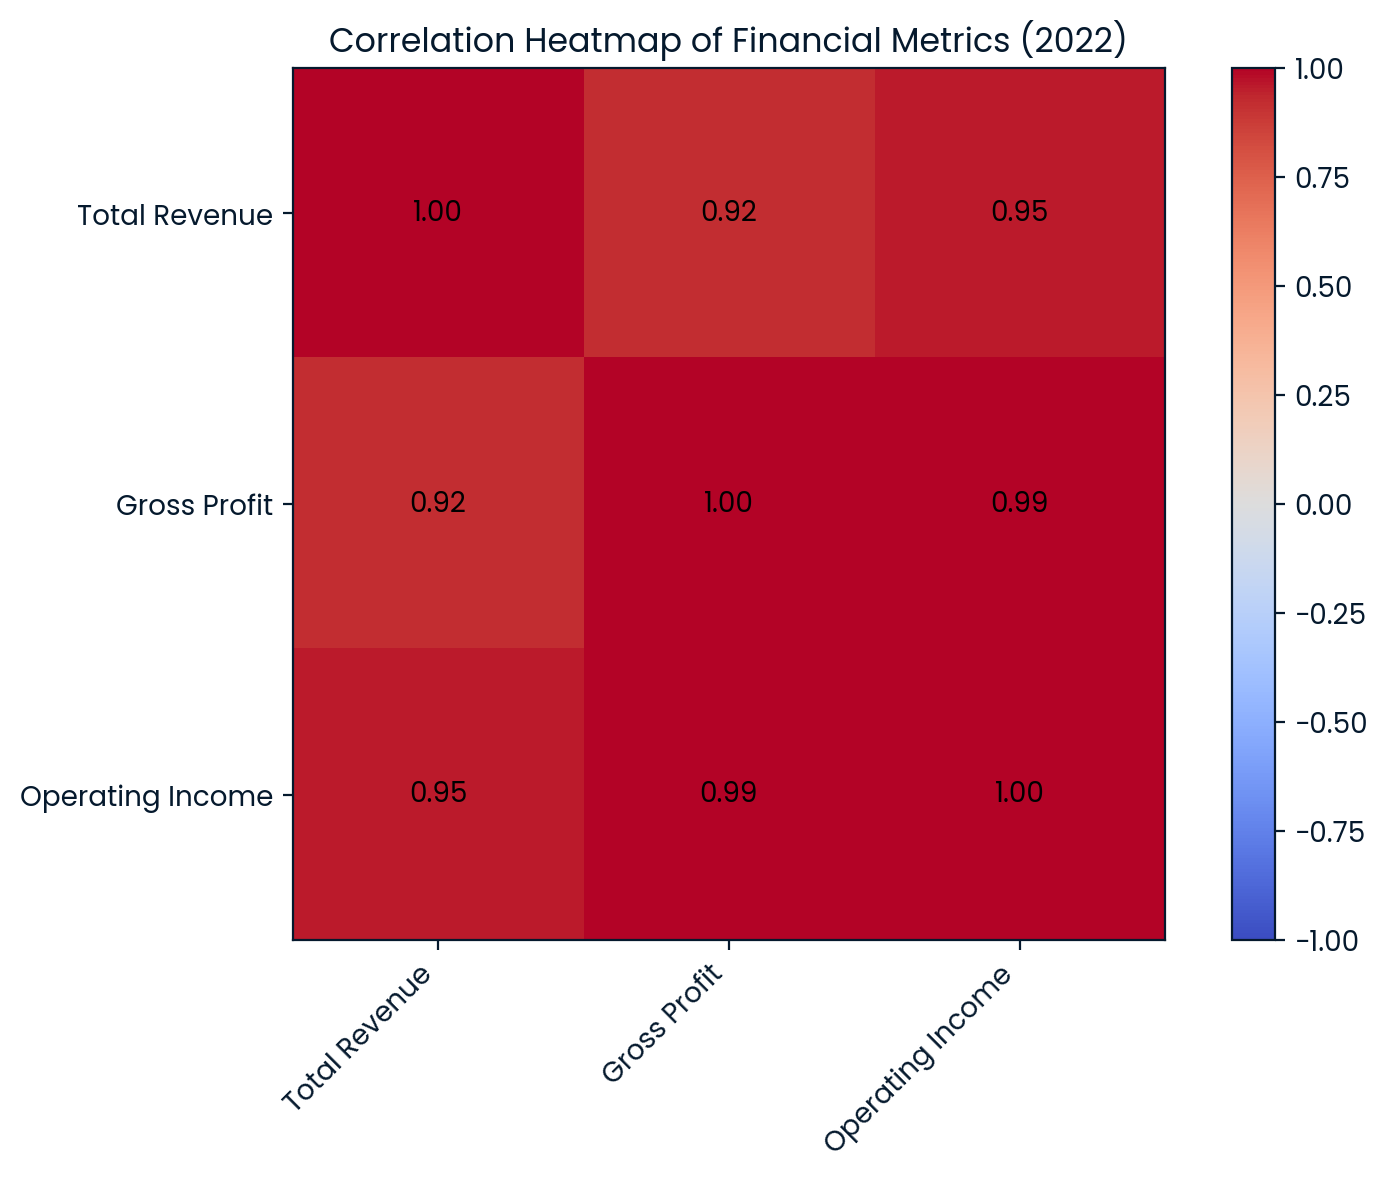

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
income_path = "data/Income_Statement.xlsx"
df = pd.read_excel(income_path)
# Drop index-like column if present
if "Unnamed: 0" in df.columns:
    df.drop(columns=["Unnamed: 0"], inplace=True)

year_of_interest = 2022  # Change as needed

# Check available columns
print("Available columns:", df.columns)

# Select relevant numeric columns and calculate correlation
metrics = ['Total Revenue', 'Gross Profit', 'Operating Income']
if 'Total Liabilities' in df.columns:
    metrics.append('Total Liabilities')

corr_data = df[df['Year'] == year_of_interest][metrics].corr()

# Plot heatmap with matplotlib
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(corr_data, cmap="coolwarm", vmin=-1, vmax=1)

# Show all ticks and label them
ax.set_xticks(np.arange(len(metrics)))
ax.set_yticks(np.arange(len(metrics)))
ax.set_xticklabels(metrics, rotation=45, ha="right")
ax.set_yticklabels(metrics)

# Annotate cells
for i in range(len(metrics)):
    for j in range(len(metrics)):
        ax.text(j, i, f"{corr_data.iloc[i, j]:.2f}",
                ha="center", va="center",
                color="black")

# Title and colorbar
ax.set_title(f"Correlation Heatmap of Financial Metrics ({year_of_interest})")
fig.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

## Gross Profit Distribution by Sector

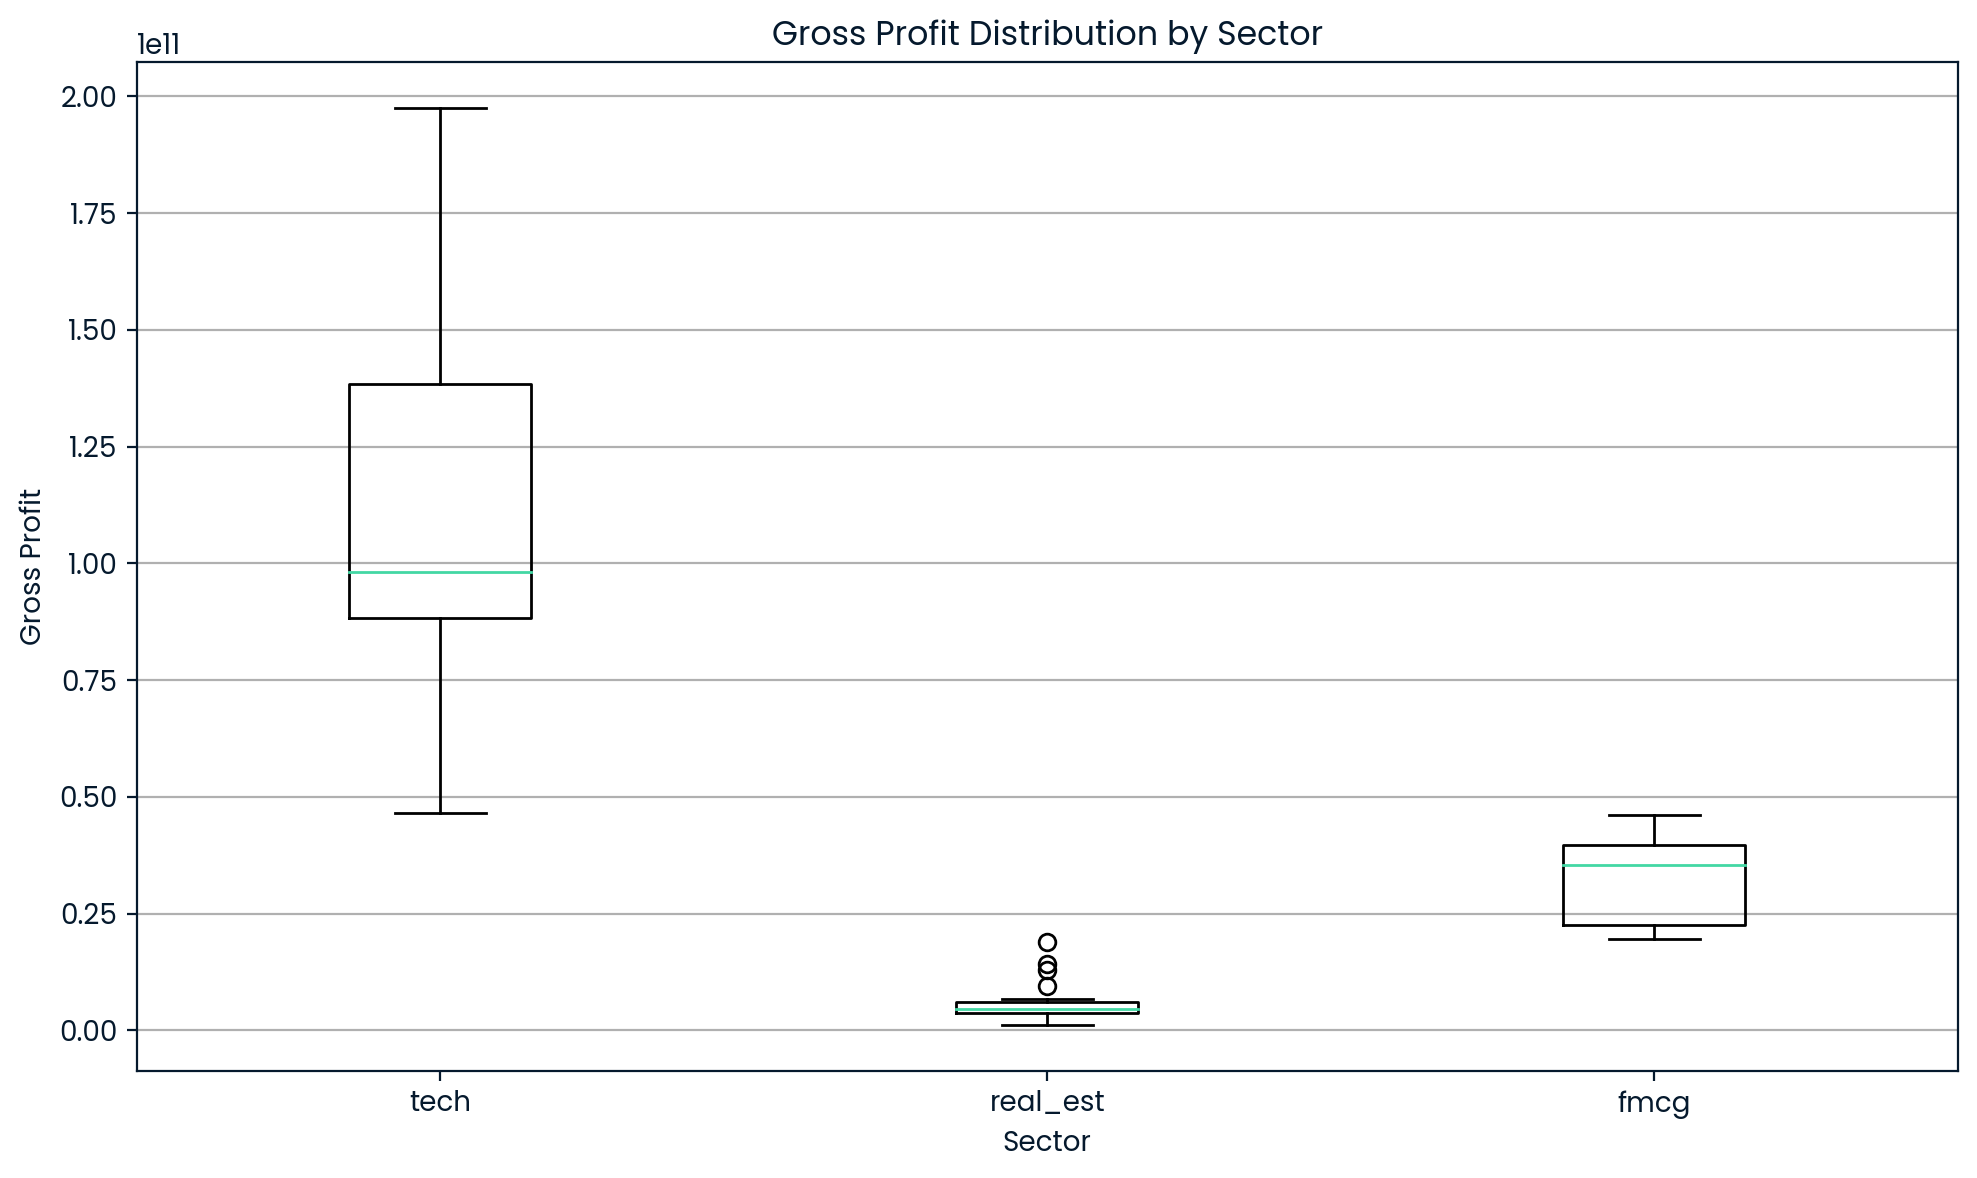

In [16]:
plt.figure(figsize=(10, 6))

# Group data by sector and collect Gross Profit values
sectors = df["comp_type"].unique()
data_to_plot = [df[df["comp_type"] == sector]["Gross Profit"].dropna() for sector in sectors]

# Create boxplot
plt.boxplot(data_to_plot, labels=sectors)

plt.title("Gross Profit Distribution by Sector")
plt.xlabel("Sector")
plt.ylabel("Gross Profit")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

## Operating Income vs Total Revenue by Sector and Year

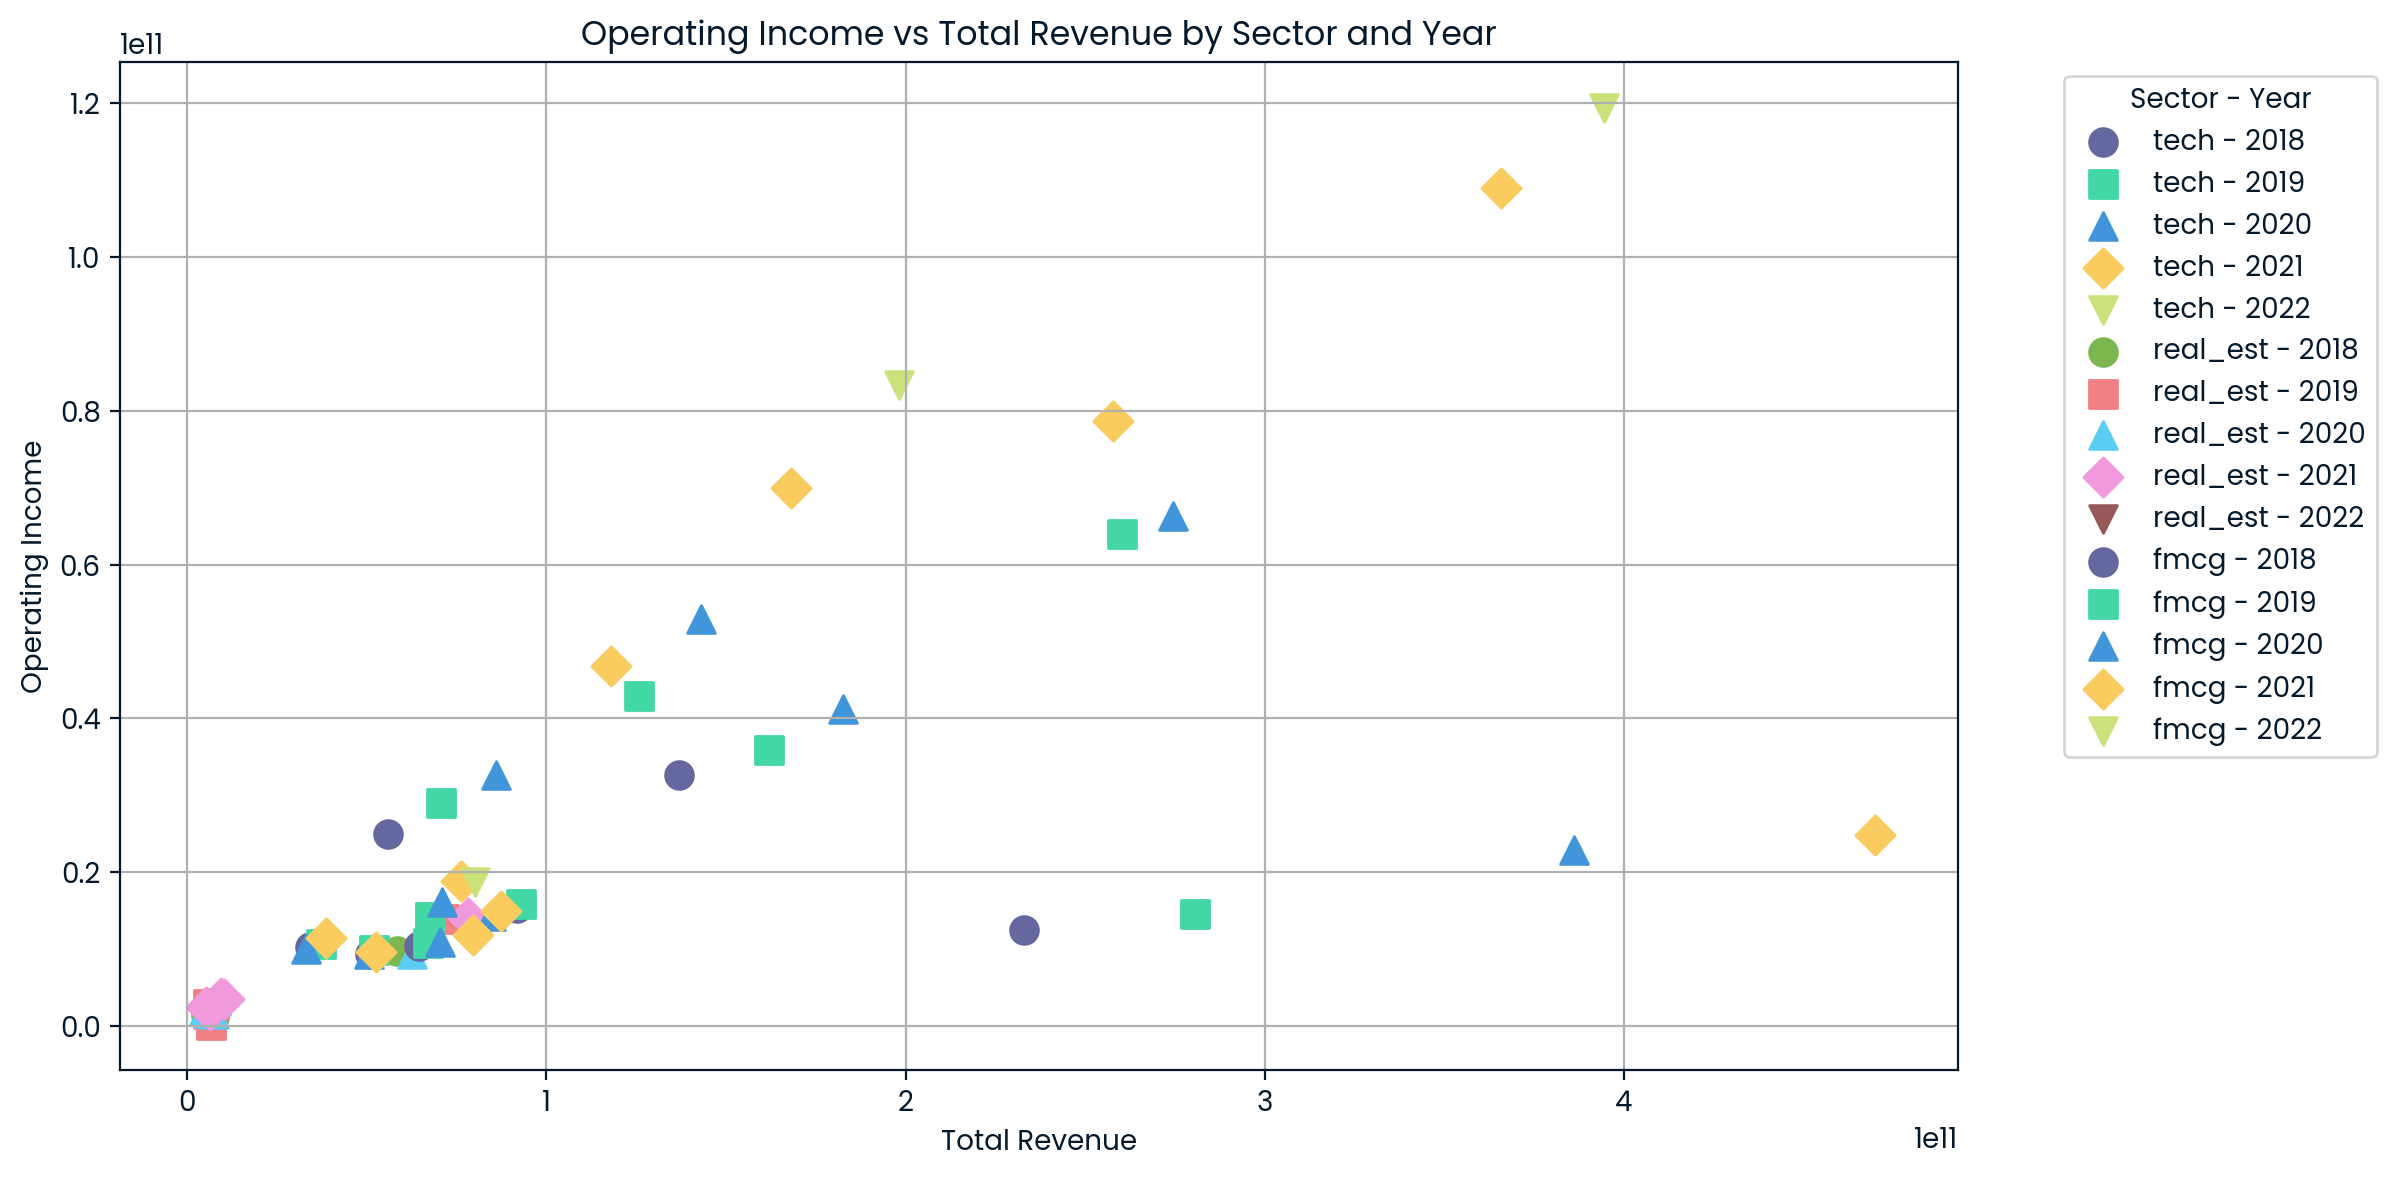

In [15]:
plt.figure(figsize=(10, 6))

# Create unique markers for each Year
years = sorted(df["Year"].unique())
markers = ["o", "s", "^", "D", "v", "P", "*"]  # cycle if more years
marker_map = {year: markers[i % len(markers)] for i, year in enumerate(years)}

# Plot each combination of sector and year
for sector in df["comp_type"].unique():
    sector_df = df[df["comp_type"] == sector]
    for year in years:
        subset = sector_df[sector_df["Year"] == year]
        plt.scatter(
            subset["Total Revenue"],
            subset["Operating Income"],
            s=100,
            marker=marker_map[year],
            label=f"{sector} - {year}"
        )

plt.title("Operating Income vs Total Revenue by Sector and Year")
plt.xlabel("Total Revenue")
plt.ylabel("Operating Income")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Sector - Year", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()